In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
label_file = '../data/p3/data/driving_log.csv'
data_dir = '../data/p3/data/'
#data = pd.read_csv(label_file)[['center','steering']]
data = pd.read_csv(label_file)[['center','left','right','steering']]

In [20]:
# 3 samples
y_train_ = [data[data.steering==0.0].steering.iloc[0],
       data[data.steering>0.0].steering.iloc[0],
       data[data.steering<0.0].steering.iloc[0]]

X_train_ = np.array([plt.imread(data_dir+data[data.steering==0.0].center.iloc[0]),
       plt.imread(data_dir+data[data.steering>0.0].center.iloc[0]),
       plt.imread(data_dir+data[data.steering<0.0].center.iloc[0])])

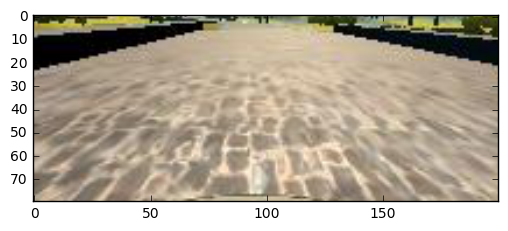

In [26]:
plt.imshow(X_train_[0][60:140,60:260,:])

In [25]:
## y_train = np.asarray(data.steering)
y_train.shape

(8036,)

In [29]:
arr_size = len(y_train)
X_train=np.empty((arr_size,80,240,3))
for i, url in enumerate(data.center):
    X_train[i] = plt.imread(data_dir + url)[60:140,40:280,:]

In [30]:
X_train.shape

(8036, 80, 240, 3)

In [35]:
model = Sequential()
#input 320*160*3 output 160*80*64
model.add(Convolution2D(64, 7, 7, subsample = (2,2), input_shape=(80,240,3)))
#output 80*40*64
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#output 80*40*192
model.add(Convolution2D(192, 3, 3, subsample = (1,1)))
#output 40*20*192
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Dropout(0.4))
model.add(Activation('relu'))
# output 153600
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')





model.fit(np.asarray(X_train), np.asarray(y_train), nb_epoch=5, batch_size=32)
#score = model.evaluate(X_test, y_test, batch_size=32)
#score



Epoch 1/5
8036/8036 [==============================] - 120s - loss: 29973.7559   
Epoch 2/5
8036/8036 [==============================] - 119s - loss: 0.0167   
Epoch 3/5
8036/8036 [==============================] - 119s - loss: 0.0167   
Epoch 4/5
8036/8036 [==============================] - 122s - loss: 0.0167   
Epoch 5/5
8036/8036 [==============================] - 122s - loss: 0.0167   


In [36]:
# save as JSON
json_string = model.to_json()
# serialize weights to HDF5
model.save_weights("model.h5")

with open("model.json", "w") as json_file:
    json_file.write(json_string)


print("Saved model to disk")

Saved model to disk


In [ ]:
#norm X_train
X_train = (X_train - 128)/128

akt = 'relu'

model = Sequential()
model.add(Convolution2D(24, 5, 5, subsample = (2, 2), input_shape=(80, 240, 3),border_mode='valid',aktivation=akt))
model.add(Convolution2D(36, 5, 5, subsample = (2, 2), border_mode='valid',aktivation=akt))
model.add(Convolution2D(48, 5, 5, subsample = (2, 2), border_mode='valid',aktivation=akt))
model.add(Convolution2D(64, 3, 3, subsample = (1, 1), border_mode='valid',aktivation=akt))
model.add(Convolution2D(64, 3, 3, subsample = (1, 1), border_mode='valid',aktivation=akt))
model.add(Convolution2D(64, 3, 3, subsample = (1, 1), border_mode='valid',aktivation=akt))

model.add(Flatten())
model.add(Dense(100),aktivation=akt)
model.add(Dense(50),aktivation=akt)
model.add(Dense(10),aktivation=akt)
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
